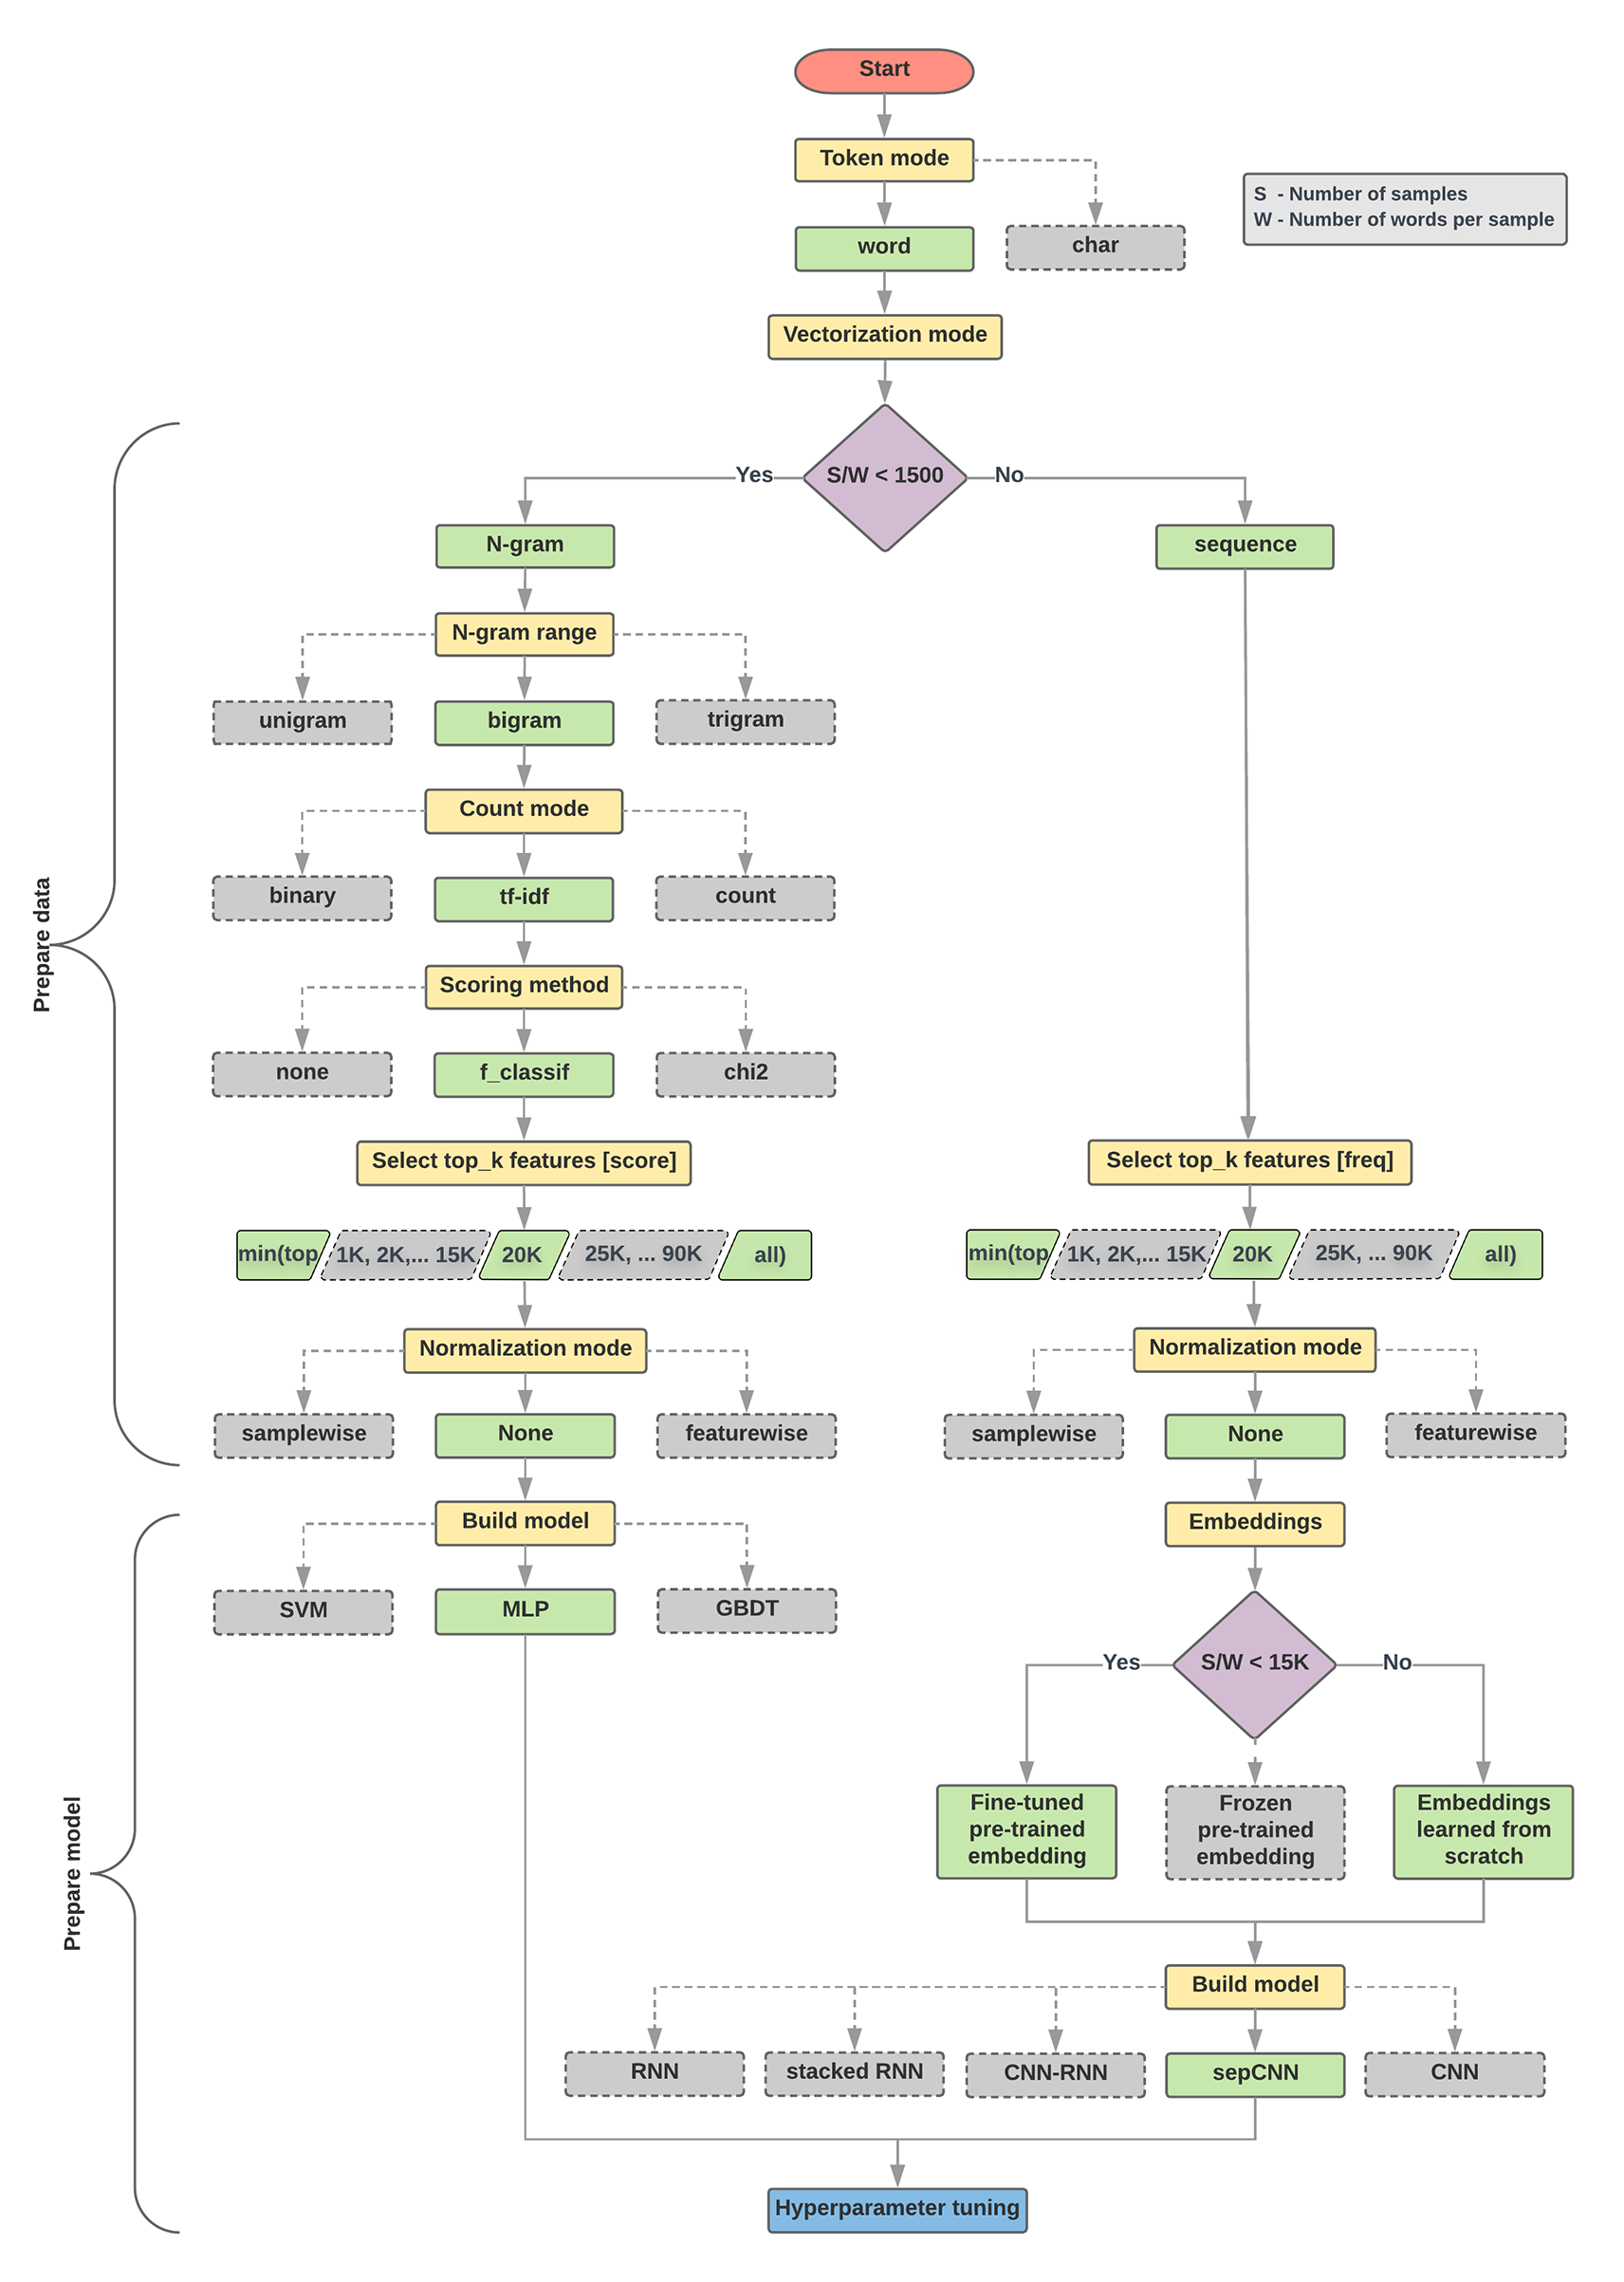

# Import package

## utlis

In [4]:

## 使用Tokenizer对词组进行编码
## 当我们创建了一个Tokenizer对象后，使用该对象的fit_on_texts()函数，以空格去识别每个词,
## 可以将输入的文本中的每个词编号，编号是根据词频的，词频越大，编号越小。
max_words = 5000
max_len = 300



def sequence_vectorize(train_texts, val_texts):
    """Vectorizes texts as sequence vectors.

    1 text = 1 sequence vector with fixed length.

    # Arguments
        train_texts: list, training text strings.
        val_texts: list, validation text strings.

    # Returns
        x_train, x_val, word_index: vectorized training and validation
            texts and word index dictionary.
    """
    # Create vocabulary with training texts.
    tokenizer = text.Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(train_texts)

    # Vectorize training and validation texts.
    x_train = tokenizer.texts_to_sequences(train_texts)
    x_val = tokenizer.texts_to_sequences(val_texts)

    # Get max sequence length.
    max_length = len(max(x_train, key=len))
    if max_length > max_len:
        max_length = max_len

    # Fix sequence length to max value. Sequences shorter than the length are
    # padded in the beginning and sequences longer are truncated
    # at the beginning.
    x_train = sequence.pad_sequences(x_train, maxlen=max_length)
    x_val = sequence.pad_sequences(x_val, maxlen=max_length)
    return x_train, x_val, tokenizer







def plot_gradients(model_history):

    history_dict = model_history.history
    print(history_dict.keys())

    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(acc) + 1)
    fig = plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
    plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
# plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()
def class_report(y,ypred,keys):
    labels = list(dic_y_mapping.values())

    labels_num = list(dic_y_mapping.keys())

    conf_mat = confusion_matrix(y, ypred)
    fig, ax = plt.subplots(figsize=(10,8))
    sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=labels, yticklabels=labels_num,cmap="Blues")
    plt.ylabel('actual results',fontsize=12);
    plt.xlabel('predict result',fontsize=12)
    print('accuracy %s' % accuracy_score(y, ypred))
    print(classification_report(y, ypred,target_names=[str(w) for w in labels]))
    
def add_encode_variable(dtf, column):
    dtf[column+"_id"] = dtf[column].factorize(sort=True)[0]
    dic_class_mapping = dict( dtf[[column+"_id",column]].drop_duplicates().sort_values(column+"_id").values )
    return dtf, dic_class_mapping

def predict_binary_class(yhat):
    yhat[yhat<=0.5]=0
    yhat[yhat>0.5]=1
    return yhat


df, dic_y_mapping = add_encode_variable(df, "label_confirm")


In [1]:
import glob
import os
import psycopg2
import seaborn as sns
from sqlalchemy import create_engine 
import numpy as np
import jieba 
import pandas as pd
from gensim.models import Word2Vec
import time
import pickle
# import snownlp
import warnings
import re
import jieba.posseg as pseg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.preprocessing import text
from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras import initializers
from tensorflow.python.keras import regularizers
from tensorflow.python.keras.layers import Embedding
from tensorflow.python.keras.layers import SeparableConv1D
from tensorflow.python.keras.layers import MaxPooling1D,Convolution1D, MaxPool1D, Flatten
from tensorflow.python.keras.layers import GlobalAveragePooling1D
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing, impute, utils, linear_model, feature_selection, model_selection, metrics, decomposition, cluster, ensemble
from  sklearn.metrics import classification_report 
# from kerastuner.tuners import RandomSearch
import joblib
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")
os.chdir('/data/jyu29/nlp/text classfication/')

print('load package complete')


load package complete


## read data

In [3]:
df = pd.read_csv('/data/jyu29/nlp/text classfication/invalid_remark/data/invalid_remark_raw_masterdata_v2.csv')
# df = df.fillna('谢谢老板')
df = df.loc[df.text.notnull()]
# df1 = df.drop_duplicates(subset=['text'], keep="last")

df.head(2)
# dfa = dfa[['order_bn','text','label_confirm_by_business']]
# dfa = dfa.rename({'label_confirm_by_business':'label_confirm'},axis=1)
# # df1 = df.drop_duplicates(subset=['text'], keep="last")
# dfa.head()

,order_bn,text,label_confirm
0,5.67e+17,亲，请尽快帮我发货可以吗？我周六要出去露营，着急要,1
1,6.65e+17,请检查后发货哦。谢谢！,1


In [35]:
# df0 = df.loc[df.label_confirm==0]
# df1 = df.loc[df.label_confirm==1].drop_duplicates(subset=['text'], keep="last").groupby("label_confirm").sample(5000)

In [3]:
# dfnew = df0.append(df1)
# df.shape,dfnew.shape

In [26]:
# dfb = pd.read_csv('/data/jyu29/nlp/text classfication/invalid_remark/data/remark_train_3.csv')
# # dfb.head()
# dfb = dfb[['order_bn', 'customer_remark', 
#        'manual tag']]
# dfb = dfb.rename({'manual tag':'label_confirm','customer_remark':'text'},axis=1)
# # # df1 = df.drop_duplicates(subset=['text'], keep="last")
# dfb.head(2)

In [24]:
# dfmaster2 = df.append(dfb)

In [13]:
# dfc = pd.read_csv('/data/jyu29/nlp/text classfication/invalid_remark/data/remark_train_2.csv')
# dfc = dfc[['order_bn', 'customer_remark', 
#        '人工check']]
# dfc = dfc.rename({'人工check':'label_confirm','customer_remark':'text'},axis=1)

# dfc.head(2)

In [21]:
# dfmaster = pd.concat([dfa,dfb,dfc],axis=1)

In [26]:
# dfmaster = dfa.append(dfc)

In [28]:
# dfmaster1 = dfmaster.append(dfb)

In [25]:
# dfmaster2.to_csv('/data/jyu29/nlp/text classfication/invalid_remark/data/invalid_remark_raw_masterdata_v3.csv',index=False)

In [ ]:
# train_size = int(len(articles) * training_portion)
 
# train_articles = articles[0: train_size]
# train_labels = labels[0: train_size]
 
# validation_articles = articles[train_size:]
# validation_labels = labels[train_size:]
 
# print(train_size)
# print(len(train_articles))
# print(len(train_labels))
# print(len(validation_articles))
# print(len(validation_labels))

## Plot class

In [88]:
def plot_distributions(data, x, max_cat=20, top=None, y=None, bins=None, figsize=(10,5)):
    ## univariate
    if y is None:
        fig, ax = plt.subplots(figsize=figsize)
        fig.suptitle(x, fontsize=15)
        ### categorical
        if data[x].nunique() <= max_cat:
            if top is None:
                data[x].reset_index().groupby(x).count().sort_values(by="index").plot(kind="barh", legend=False, ax=ax).grid(axis='x')
            else:   
                data[x].reset_index().groupby(x).count().sort_values(by="index").tail(top).plot(kind="barh", legend=False, ax=ax).grid(axis='x')
            ax.set(ylabel=None)
        ### numerical
        else:
            sns.distplot(data[x], hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
            ax.grid(True)
            ax.set(xlabel=None, yticklabels=[], yticks=[])

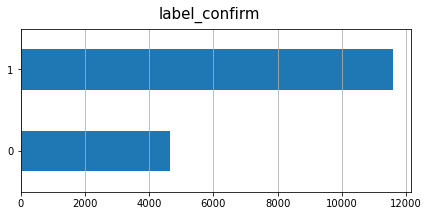

In [89]:
plot_distributions(df, x="label_confirm", top=None, figsize=(7,3))

In [22]:
# plot_distributions(test, x="label_confirm", top=None, figsize=(7,3))

In [23]:


# segments = []
    

# for index, row in df.iterrows():
    
#     sentence= row[0]
    
    
# #     sentence = re.sub(r'\s+[a-zA-Z]\s+', '', sentence)

# #         # Remove single characters from the start
# #     sentence = re.sub(r'\^[a-zA-Z]\s+', '', sentence)

# #         # Substituting multiple spaces with single space
# #     sentence = re.sub(r'\s+', '', sentence, flags=re.I)

# #         # Removing prefixed 'b'
# #     sentence = re.sub(r'^b\s+', '', sentence)
# #     sentence = re.sub(r"[^a-zA-Z0-9\u4e00-\u9fa5]", '', sentence)

#     #TextRank 关键词抽取，只获取固定词性
    

#     words = pseg.cut(sentence,use_paddle=True)
#     splitedStr = ''
#     for word,flag in words:
#         #停用词判断，如果当前的关键词不在停用词库中才进行记录
#         if word not in stopword_set:
#             # 记录全局分词
#             segments.append({'word':word, 'count':1,'entity':flag})
#             splitedStr += word + ' '
            
# dfSg = pd.DataFrame(segments)

# # 词频统计
# dfWord = dfSg.groupby('word')['count'].sum()
# wordcount = dfSg.groupby(['word','entity']).agg({'count': 'sum'}).reset_index().sort_values('count',ascending=False)
# wordcount.head(5)

# listkeep = ['M', 'L', 'XL', 'S', 'xl', 'cm', 's',
#        'm', 'XS', 'XXL', 'kg', 
#        'l',  'xxl', 'XXS',   'xs', 
#        'KG', 'xxs', 'Xl', 
# ]
# wordcount1 = wordcount.loc[~wordcount.word.isin(listkeep)]
# listm = list(wordcount.loc[wordcount.entity=='m'].word.unique())
# listeng = list(wordcount1.loc[(wordcount1.entity=='eng')].word.unique())

# # del_list = listns + listnr+listnt+listm+listeng
# del_list = listeng

停顿词列表，即变量stopword_list中共有767个元素
停顿词集合，即变量stopword_set中共有750个元素


In [18]:
# wordseg=[]
# tempList=[]
# l = []
# wordseg2 = []

# def blank_rm(blist:list):
#     """去除list中的空格项/remove blank items in the list"""
#     newlist=[]
#     for item in blist:
#        if (item != '') and (item!=' '):
#            newlist.append(item)
    
#     return newlist




# for index,row in train.iterrows():
# #     if type(row[1])=='int':
# #         row[1]=str(row[1])
#     sentence= row[1]
# #     print(sentence)
# #     sentence = re.sub(r'\s+[a-zA-Z]\s+', '', sentence)

# #         # Remove single characters from the start
# #     sentence = re.sub(r'\^[a-zA-Z]\s+', '', sentence)

# #         # Substituting multiple spaces with single space
# #     sentence = re.sub(r'\s+', '', sentence, flags=re.I)

# #         # Removing prefixed 'b'
# #     sentence = re.sub(r'^b\s+', '', sentence)
# #     sentence = re.sub(r"[^a-zA-Z0-9\u4e00-\u9fa5]", '', sentence)

#     tempList=[word for word in jieba.cut(sentence) if word not in stopword_set]
# #     tempList1 = [word for word in tempList if word not in del_list]
#     newList=blank_rm(tempList)
        
#     wordseg.append(newList)
    

        
# #         for item in wordseg:
# #             if item == []:
# # #         print('empty')
# #                 item = ['谢谢']
# # #                 newitem = ' '.join(item)
# # #         print(item)
# #             else:
# #                 newitem = ' '.join(item)
        
# #         wordseg2.append(newitem)


In [19]:
# wordseg1 = []
# for index,row in test.iterrows():
#     if type(row[1])=='int':
#         row[1]=str(row[1])
#     sentence= row[1]
# #     sentence = re.sub(r'\s+[a-zA-Z]\s+', '', sentence)

# #         # Remove single characters from the start
# #     sentence = re.sub(r'\^[a-zA-Z]\s+', '', sentence)

# #         # Substituting multiple spaces with single space
# #     sentence = re.sub(r'\s+', '', sentence, flags=re.I)

# #         # Removing prefixed 'b'
# #     sentence = re.sub(r'^b\s+', '', sentence)
# #     sentence = re.sub(r"[^a-zA-Z0-9\u4e00-\u9fa5]", '', sentence)

#     tempList=[word for word in jieba.cut(sentence) if word not in stopword_set]
# #     tempList1 = [word for word in tempList if word not in del_list]
#     newList=blank_rm(tempList)
        
#     wordseg1.append(newList)

In [36]:
# wordseg

In [20]:
# l = []
# for item in wordseg:
#     newitem = ' '.join(item)
#     l.append(newitem)

# l1 = []
# for item1 in wordseg1:
#     newitem1 = ' '.join(item1)
#     l1.append(newitem1)

In [7]:
# x_cut_train = l
# x_cut_test = l1
# y_train = train['label_confirm'].values
# y_test = test['label_confirm'].values

# print(len(x_cut_train),y_train.shape,len(x_cut_test),y_test.shape)

# preprocess

## clean text

https://machinelearningmastery.com/best-practices-document-classification-deep-learning/

In the subsequent paragraphs, we will see how to do tokenization and vectorization for sequence models. We will also cover how we can optimize the sequence representation using feature selection and normalization techniques.

For some text samples, word order is critical to the text’s meaning. For example, the sentences, “I used to hate my commute. My new bike changed that completely” can be understood only when read in order. Models such as CNNs/RNNs can infer meaning from the order of words in a sample. For these models, we represent the text as a sequence of tokens, preserving order.

__Tokenization:__

- Text can be represented as either a sequence of characters, or a sequence of words. We have found that using word-level representation provides better performance than character tokens. This is also the general norm that is followed by industry. Using character tokens makes sense only if texts have lots of typos, which isn’t normally the case.

__Vectorization:__
- Once we have converted our text samples into sequences of words, we need to turn these sequences into numerical vectors. The example below shows the indexes assigned to the unigrams generated for two texts, and then the sequence of token indexes to which the first text is converted.

Sequence models often have such an embedding layer as their first layer. This layer learns to turn word index sequences into word embedding vectors during the training process, such that each word index gets mapped to a dense vector of real values representing that word’s location in semantic space 

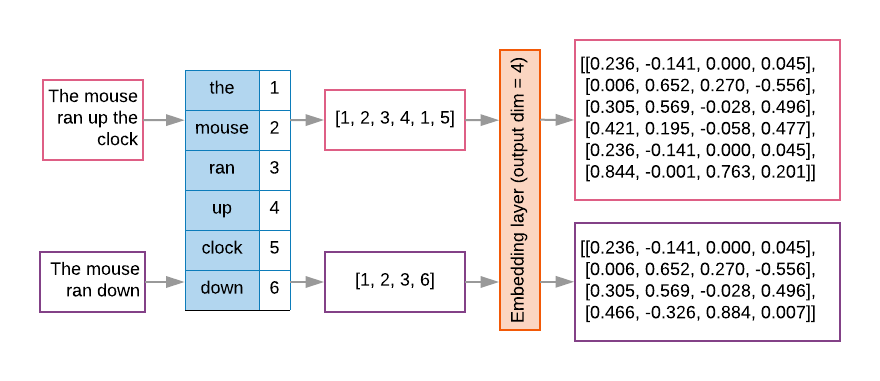

In [5]:
with open(r'/data/max_guan_test/dataRank/cs_remark/data/stopword.txt',encoding='utf8') as f:
    line_list=f.readlines()
    stopword_list=[k.strip() for k in line_list]
    stopword_set=set(stopword_list)
    print('停顿词列表，即变量stopword_list中共有%d个元素' %len(stopword_list))
    print('停顿词集合，即变量stopword_set中共有%d个元素' %len(stopword_set))
    
jieba.load_userdict(r"/data/jyu29/nlp/text classfication/ilsten/data/dictionary/joe_remark_dict.txt")

def length_text(data):
    data['text_length'] = data['clean_text'].str.len()
    return data



def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('',line)
    return line

df['clean_text'] = df['text'].apply(remove_punctuation)
df= length_text(df)
# dfnew['cut_text'] = dfnew['clean_text'].apply(lambda x: " ".join([w for w in list(jieba.cut(x)) if w not in stopword_list]))
df['cut_text'] = df['clean_text'].apply(lambda x: " ".join([w for w in list(jieba.cut(x)) ]))

df = df.loc[df.text_length>1]

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache


停顿词列表，即变量stopword_list中共有767个元素
停顿词集合，即变量stopword_set中共有750个元素


Loading model cost 0.668 seconds.
Prefix dict has been built successfully.


## plot text length

<AxesSubplot:xlabel='text_length', ylabel='Density'>

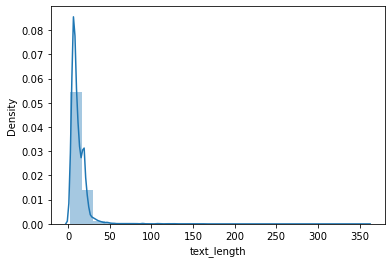

In [5]:
import seaborn as sn

sn.distplot(df['text_length'],bins=25)

In [6]:
df.text_length.describe()

count    16200.000000
mean        12.081914
std         11.027054
min          2.000000
25%          7.000000
50%          9.000000
75%         16.000000
max        358.000000
Name: text_length, dtype: float64

In [104]:
df.text_length.quantile(.95)

24.0

In [100]:
# df.loc[df.text_length==1]

## split data

In [8]:
train=df.sample(frac=0.8,random_state=0) #random state is a seed value
test=df.drop(train.index)
train.shape,test.shape

((12960, 7), (3240, 7))

## pad sequence

sequence vector



For some text samples, word order is critical to the text’s meaning. For example, the sentences, “I used to hate my commute. My new bike changed that completely” can be understood only when read in order. Models such as CNNs/RNNs can infer meaning from the order of words in a sample. For these models, we represent the text as a sequence of tokens, preserving order.




__Tokenization:__
- Text can be represented as either a sequence of characters, or a sequence of words. We have found that using word-level representation provides better performance than character tokens. This is also the general norm that is followed by industry. Using character tokens makes sense only if texts have lots of typos, which isn’t normally the case.

__Vectorization:__
- Once we have converted our text samples into sequences of words, we need to turn these sequences into numerical vectors. The example below shows the indexes assigned to the unigrams generated for two texts, and then the sequence of token indexes to which the first text is converted.

Texts: 'The mouse ran up the clock' and 'The mouse ran down'
Index assigned for every token: {'clock': 5, 'ran': 3, 'up': 4, 'down': 6, 'the': 1, 'mouse': 2}.
NOTE: 'the' occurs most frequently, so the index value of 1 is assigned to it.
Some libraries reserve index 0 for unknown tokens, as is the case here.
Sequence of token indexes: 'The mouse ran up the clock' = [1, 2, 3, 4, 1, 5]

In [9]:
## 使用Tokenizer对词组进行编码
## 当我们创建了一个Tokenizer对象后，使用该对象的fit_on_texts()函数，以空格去识别每个词,
## 可以将输入的文本中的每个词编号，编号是根据词频的，词频越大，编号越小。
max_words = 5000
max_len = 300



def sequence_vectorize(train_texts, val_texts):
    """Vectorizes texts as sequence vectors.

    1 text = 1 sequence vector with fixed length.

    # Arguments
        train_texts: list, training text strings.
        val_texts: list, validation text strings.

    # Returns
        x_train, x_val, word_index: vectorized training and validation
            texts and word index dictionary.
    """
    # Create vocabulary with training texts.
    tokenizer = text.Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(train_texts)

    # Vectorize training and validation texts.
    x_train = tokenizer.texts_to_sequences(train_texts)
    x_val = tokenizer.texts_to_sequences(val_texts)

    # Get max sequence length.
    max_length = len(max(x_train, key=len))
    if max_length > max_len:
        max_length = max_len

    # Fix sequence length to max value. Sequences shorter than the length are
    # padded in the beginning and sequences longer are truncated
    # at the beginning.
    x_train = sequence.pad_sequences(x_train, maxlen=max_length)
    x_val = sequence.pad_sequences(x_val, maxlen=max_length)
    return x_train, x_val, tokenizer


In [10]:
x_cut_train = train.cut_text.tolist()
x_cut_test = test.cut_text.tolist()
x_train,x_test,token_trained = sequence_vectorize(x_cut_train, x_cut_test)
y_train = train.label_confirm
y_test = test.label_confirm
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((12960, 194), (12960,), (3240, 194), (3240,))

## parameter

In [ ]:
# model = Sequential()
# model.add(Embedding(len(dict)+1, 256))
# model.add(LSTM(128)) # try using a GRU instead, for fun
# model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(encoder.vocab_size, 64),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1)
# ])

# model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               optimizer=tf.keras.optimizers.Adam(1e-4),
#               metrics=['accuracy'])

In [ ]:
# vocab_size : 设置最频繁使用的5000个词
# embedding_dim:设置嵌入层的维度  64
# max_length ：设置每条 cut_review最大的词语数为150个(超过的将会被截去,不足的将会自动填充0)
# trunc_type ：如果评语的词语数量超过150个词，将从评语的尾部拦截掉多余的词语
# padding_type：如果评语的词语数量少于150个词，将从评语的尾部填充0，并补足150个词语的长度
# oov_tok：凡是遇到那些没有见过的词(最频繁的5000个词之外的词语)，我们会用特殊符号来如“<OOV>”来替代。


In [ ]:
# model = keras.Sequential()
# model.add(layers.Embedding(vocab_size, 16))
# model.add(layers.GlobalAveragePooling1D())
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.summary()
# model.compile(optimizer='adam',
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

In [ ]:
# class TrainingConfig(object):
#     epoches = 5
#     evaluateEvery = 100
#     checkpointEvery = 100
#     learningRate = 0.001
    
# class ModelConfig(object):
#     embeddingSize = 200
#     numFilters = 128

#     filterSizes = [2, 3, 4, 5]
#     dropoutKeepProb = 0.5
#     l2RegLambda = 0.


In [ ]:
#         embedding = Embedding(self.max_features, self.embedding_dims, input_length=self.maxlen)(input)
#         x = Bidirectional(LSTM(128, return_sequences=True))(embedding)  # LSTM or GRU
#         x = Attention(self.maxlen)(x)

#         output = Dense(self.class_num, activation=self.last_activation)(x)


### save tokenizer

In [18]:
import joblib 
joblib.dump(token_trained,'dataFile_0924_2.pkl')  #模型保存
# tokenizer = joblib.load('dataFile.pkl') #模型载入

['dataFile_0924_2.pkl']

In [12]:
# token_reload = joblib.load('dataFile.pkl') #模型载入

In [357]:
token_reload.texts_to_sequences(x_cut_train)[0:1]

[[107, 1789, 152]]

In [358]:
token_trained.texts_to_sequences(x_cut_train)[0:1]

[[107, 1789, 152]]

In [391]:
# max_len = 300
a = df1.iloc[3100:3106]
input_x = clean_text(a)

xtoken = token_trained.texts_to_sequences(input_x)
xsequence = sequence.pad_sequences(xtoken)
xsequence.shape

停顿词列表，即变量stopword_list中共有767个元素
停顿词集合，即变量stopword_set中共有750个元素


(6, 8)

In [392]:
y_new2 = a.label_confirm_by_business

In [371]:
path = '/data/jyu29/nlp/text classfication/invalid_remark/model/rnnmodel.h5'

rnn = keras.models.load_model(path)

In [393]:
rnn.evaluate(xsequence,y_new2)

1/1 [==============================] - 0s 18ms/step - loss: 0.0116 - precision_3: 1.0000 - recall_1: 1.0000 - true_positives: 3.0000 - true_negatives: 3.0000


[0.011628411710262299, 1.0, 1.0, 3.0, 3.0]

In [394]:
pred3 = rnn.predict(xsequence)
# y_test_new = test.label_confirm_by_business
yhat3 = np.array(predict_binary_class(pred3))

In [9]:
# report(y_new2,yhat3) 

In [363]:
# token_reload.texts_to_sequences(input_x)

In [347]:
# tokenizer = token_trained

In [25]:
# x_train.shape,x_test.shape

In [26]:
# testa = sequence_new(input_x, tokenizer)

In [27]:
# testa.shape

In [298]:
# token_index
# {'谢谢': 1,
#  '请': 2,
#  '发货': 3,
#  '检查': 4,
#  '质量': 5,
#  '麻烦': 6,
#  '包装': 7,
#  '快递': 8,
#  '发': 9,
#  '发货前': 10,
#  '中通': 11,
#  '瑕疵': 12,
#  '邮政': 13,
#  '申通': 14,
#  '全新': 15,
#  '圆通': 16,
#  '仔细检查': 17,
#  '保证质量': 18,
#  '韵达': 19,
#  '请发': 20,

In [10]:
# y_train.shape[0]

# Training

## rnn

In [12]:
vocab_size = 5000
embedding_dim = 256

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dim))
model.add(keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(128, activation='relu'))
# model.add(keras.layers.Dense(12, activation='relu'))

# model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# bilstm_model1 = model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 256)         1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               1050624   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,396,417
Trainable params: 2,396,417
Non-trainable params: 0
_________________________________________________________________


In [16]:
pre,recall = tf.keras.metrics.Precision(thresholds=0.5),tf.keras.metrics.Recall(thresholds=0.5)
fn,fp = tf.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives()
precall = tf.keras.metrics.PrecisionAtRecall(0.5)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[fn,fp])



checkpoint_save_path = "/data/jyu29/nlp/text classfication/invalid_remark/checkpoint/rnnmodel4.h5"



checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                monitor='val_accuracy', 
)


callbacks = [tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=2)]



history = model.fit(x_train,
                    y_train,
                    callbacks=[checkpoint,callbacks],
                    epochs=6,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/6
203/203 [==============================] - 88s 420ms/step - loss: 0.0466 - false_negatives: 35.1471 - false_positives_1: 81.0784 - val_loss: 0.2175 - val_false_negatives: 74.0000 - val_false_positives_1: 121.0000
Epoch 2/6
203/203 [==============================] - 81s 401ms/step - loss: 0.0388 - false_negatives: 30.6961 - false_positives_1: 71.6029 - val_loss: 0.2418 - val_false_negatives: 83.0000 - val_false_positives_1: 104.0000
Epoch 3/6
203/203 [==============================] - 81s 397ms/step - loss: 0.0306 - false_negatives: 23.8529 - false_positives_1: 58.3382 - val_loss: 0.2486 - val_false_negatives: 81.0000 - val_false_positives_1: 126.0000


In [ ]:
## save

In [76]:
model.save("/data/jyu29/nlp/text classfication/checkpoint/rnn_model_210923")

INFO:tensorflow:Assets written to: /data/jyu29/nlp/text classfication/checkpoint/rnn_model_210922/assets


INFO:tensorflow:Assets written to: /data/jyu29/nlp/text classfication/checkpoint/rnn_model_210922/assets


In [190]:
model.evaluate(x_test,y_test)

70/70 [==============================] - 4s 60ms/step - loss: 0.2286 - precision_7: 0.9337 - recall_7: 0.9465


[0.22863240540027618, 0.9337194561958313, 0.9465101361274719]

### result

accuracy 0.9361111111111111
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       930
           1       0.95      0.96      0.96      2310

    accuracy                           0.94      3240
   macro avg       0.93      0.91      0.92      3240
weighted avg       0.94      0.94      0.94      3240



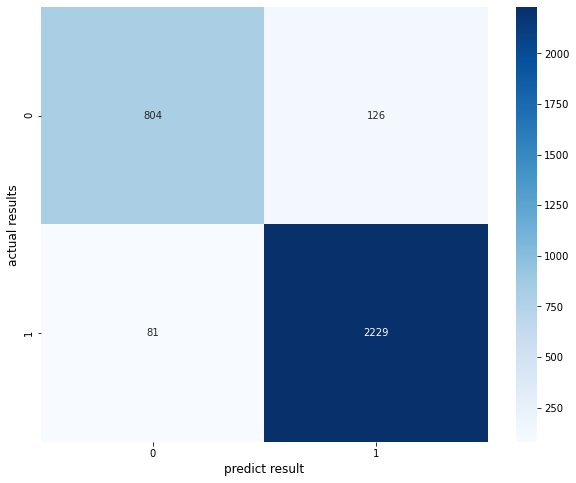

In [17]:
prediction = model.predict(x_test)
yhat_rnn = predict_binary_class(prediction)


class_report(y_test,yhat_rnn,dic_y_mapping)

accuracy 0.9407407407407408
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       930
           1       0.96      0.96      0.96      2310

    accuracy                           0.94      3240
   macro avg       0.93      0.93      0.93      3240
weighted avg       0.94      0.94      0.94      3240



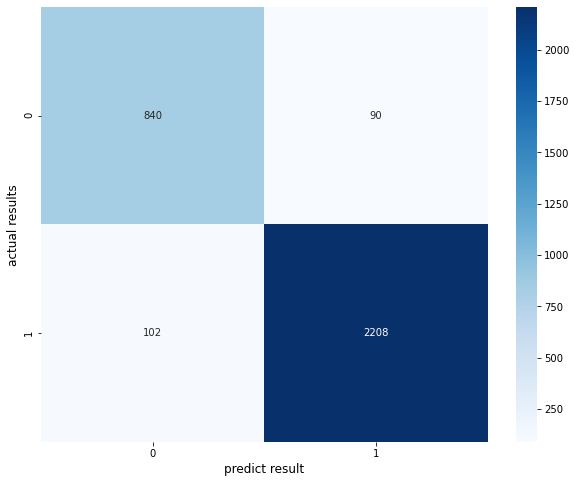

In [15]:
prediction = model.predict(x_test)
yhat_rnn = predict_binary_class(prediction)


class_report(y_test,yhat_rnn,dic_y_mapping)

accuracy 0.942283950617284
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.90       930
         1.0       0.95      0.97      0.96      2310

    accuracy                           0.94      3240
   macro avg       0.94      0.92      0.93      3240
weighted avg       0.94      0.94      0.94      3240



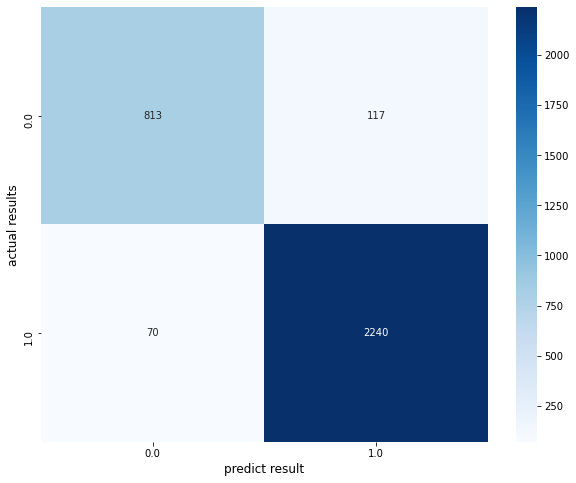

In [31]:
prediction = model.predict(x_test)
yhat_rnn = predict_binary_class(prediction)


class_report(y_test,yhat_rnn,dic_y_mapping)

accuracy 0.9395061728395062
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       930
           1       0.94      0.97      0.96      2310

    accuracy                           0.94      3240
   macro avg       0.94      0.91      0.92      3240
weighted avg       0.94      0.94      0.94      3240



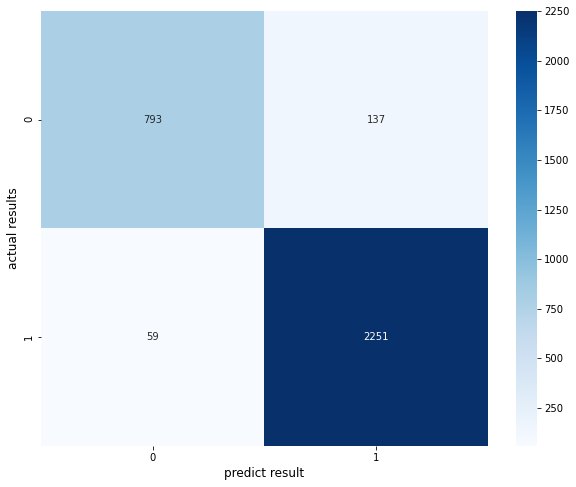

In [17]:
prediction = model.predict(x_test)
yhat_rnn = predict_binary_class(prediction)


class_report(y_test,yhat_rnn,dic_y_mapping)

accuracy 0.9161056447436562
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       939
           1       0.90      0.94      0.92       992

    accuracy                           0.92      1931
   macro avg       0.92      0.92      0.92      1931
weighted avg       0.92      0.92      0.92      1931



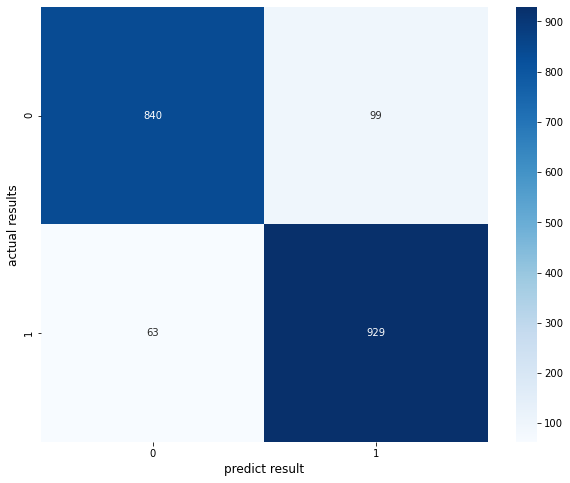

In [47]:
prediction = model.predict(x_test)
yhat_rnn = predict_binary_class(prediction)


class_report(y_test,yhat_rnn,dic_y_mapping)

accuracy 0.9197307094769549
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       939
         1.0       0.91      0.93      0.92       992

    accuracy                           0.92      1931
   macro avg       0.92      0.92      0.92      1931
weighted avg       0.92      0.92      0.92      1931



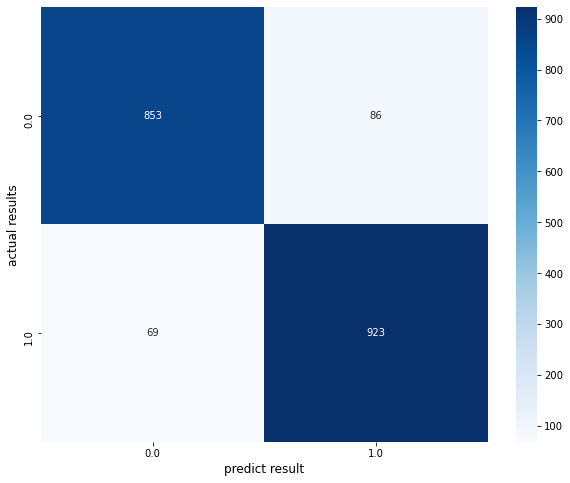

In [73]:
prediction = model.predict(x_test)
yhat_rnn = predict_binary_class(prediction)


class_report(y_test,yhat_rnn,dic_y_mapping)

### SAVE1

In [49]:
model.save("/data/jyu29/nlp/text classfication/invalid_remark/model/rnnmodel_0923.h5")

In [84]:
# model.load_weights(checkpoint_save_path)
# loss, acc = model.evaluate(x_test, y_test)


In [85]:
# model.predict(x_test)

In [86]:
# model.evaluate(x_test, y_test)

In [25]:
# history_dict = history.history
# print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [87]:
# history_dict

In [75]:
# history_dict = history.history
# print(history_dict.keys())

# acc = history_dict['accuracy']
# val_acc = history_dict['val_accuracy']
# loss = history_dict['loss']
# val_loss = history_dict['val_loss']

# epochs = range(1, len(acc) + 1)
# fig = plt.figure(figsize=(10, 6))
# fig.tight_layout()

# plt.subplot(2, 1, 1)
# # "bo" is for "blue dot"
# plt.plot(epochs, loss, 'r', label='Training loss')
# # b is for "solid blue line"
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# # plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(2, 1, 2)
# plt.plot(epochs, acc, 'r', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')

In [89]:
# model.predict(x_test).T

In [90]:
# y_test.T

In [ ]:
checkpoint_save_path = "/data/jyu29/nlp/text classfication/checkpoint/model.h5"


In [34]:
checkpoint_path = "/data/jyu29/nlp/text classfication/checkpoint/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [38]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



# checkpoint_save_path = "/data/jyu29/nlp/text classfication/checkpoint/model.h5"



# checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
#                                                 monitor='val_accuracy', 
# )


# callbacks = [tf.keras.callbacks.EarlyStopping(
#         monitor='val_loss', patience=5)]



history = model.fit(x_train,
                    y_train,
                    callbacks=[cp_callback],
                    epochs=2,
                    batch_size=128,
                    validation_data=(x_test, y_test))

Epoch 1/2
65/65 [==============================] - 22s 303ms/step - loss: 0.6455 - accuracy: 0.6220 - val_loss: 0.4532 - val_accuracy: 0.7860

Epoch 00001: saving model to /data/jyu29/nlp/text classfication/checkpoint/cp.ckpt
Epoch 2/2
65/65 [==============================] - 19s 292ms/step - loss: 0.3736 - accuracy: 0.8634 - val_loss: 0.3204 - val_accuracy: 0.8802

Epoch 00002: saving model to /data/jyu29/nlp/text classfication/checkpoint/cp.ckpt


In [40]:
model.load_weights(checkpoint_path)


In [41]:
loss, acc = model.evaluate(x_test, y_test)

65/65 [==============================] - 2s 35ms/step - loss: 0.3204 - accuracy: 0.8802


In [42]:
model.predict(x_test)

array([[0.9354278 ],
       [0.98059493],
       [0.0056718 ],
       ...,
       [0.67008924],
       [0.9802841 ],
       [0.67008924]], dtype=float32)

In [535]:
# vocab_size = 5000
# embedding_dim = 256

# model = keras.Sequential()
# model.add(keras.layers.Embedding(vocab_size, embedding_dim))

# for units in [128, 128, 64 , 32]:
#     model.add(keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,return_sequences=True)))
#     model.add(tf.keras.layers.Dense(units, activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.85))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# model.summary()

In [89]:
# vocab_size = 5000
# embedding_dim = 256

# model = keras.Sequential()
# model.add(keras.layers.Embedding(vocab_size, embedding_dim))
# model.add(keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,return_sequences=True)))
# model.add(keras.layers.Dropout(0.85))
# model.add(keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dropout(0.85))
# model.add(keras.layers.Dense(1, activation='sigmoid'))

# model.summary()




In [90]:
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# callbacks = [tf.keras.callbacks.EarlyStopping(
#         monitor='val_loss', patience=5)]



# history = model.fit(x_train,
#                     y_train,
#                     callbacks=callbacks,
#                     epochs=40,
#                     batch_size=32,
#                     validation_data=(x_test, y_test))

## CNN

In [ ]:
#  self.cnn_layer1 = layers.Conv1D(filters=cnn_filters,
#                                         kernel_size=2,
#                                         padding="valid",
#                                         activation="relu")
#         self.cnn_layer2 = layers.Conv1D(filters=cnn_filters,
#                                         kernel_size=3,
#                                         padding="valid",
#                                         activation="relu")
#         self.cnn_layer3 = layers.Conv1D(filters=cnn_filters,
#                                         kernel_size=4,
#                                         padding="valid",
#                                         activation="relu")
#         self.pool = layers.GlobalMaxPool1D()

In [79]:
vocab_size = 5000
embedding_dim = 256

# model = keras.Sequential()
# model.add(keras.layers.Embedding(vocab_size, embedding_dim))
# model.add(keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,return_sequences=True)))
# model.add(keras.layers.Dropout(0.85))
# model.add(keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dropout(0.85))
# model.add(keras.layers.Dense(1, activation='sigmoid'))

# model.summary()

cnnmodel = keras.Sequential()

cnnmodel.add(keras.layers.Embedding(vocab_size, embedding_dim))

cnnmodel.add(keras.layers.Conv1D(filters=128,kernel_size=2,strides=1,kernel_initializer='he_normal',padding='VALID',activation='relu',name='conv'))

cnnmodel.add(keras.layers.GlobalMaxPooling1D())
cnnmodel.add(keras.layers.Dense(64, activation='relu'))

cnnmodel.add(keras.layers.Dropout(0.3))
cnnmodel.add(keras.layers.Dense(1, activation='sigmoid'))

cnnmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 256)         1280000   
_________________________________________________________________
conv (Conv1D)                (None, None, 128)         65664     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 1,353,985
Trainable params: 1,353,985
Non-trainable params: 0
____________________________________________

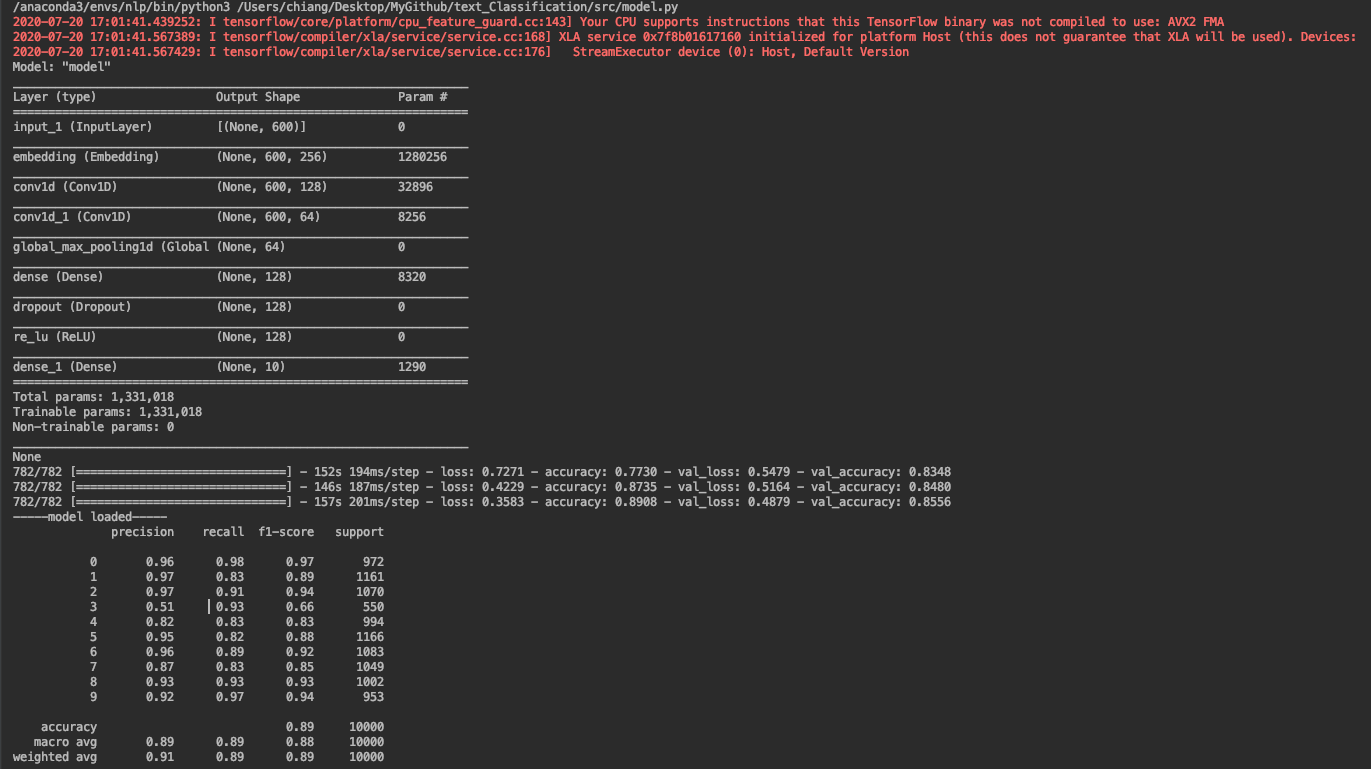

In [80]:
pre,recall = tf.keras.metrics.Precision(thresholds=0.5),tf.keras.metrics.Recall(thresholds=0.5)
tp,fp = tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives()

cnnmodel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tp,fp])



checkpoint_save_path = "/data/jyu29/nlp/text classfication/invalid_remark/checkpoint/cnnmodel3_0922.h5"



checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                monitor='val_accuracy', 
)


callbacks = [tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=2)]



history = cnnmodel.fit(x_train,
                    y_train,
                    callbacks=[checkpoint,callbacks],
                    epochs=6,
                    batch_size=128,
                    validation_data=(x_test, y_test))

Epoch 1/6
61/61 [==============================] - 2s 21ms/step - loss: 0.5231 - true_positives: 1801.6290 - true_negatives: 1529.2742 - val_loss: 0.2122 - val_true_positives: 921.0000 - val_true_negatives: 856.0000
Epoch 2/6
61/61 [==============================] - 1s 18ms/step - loss: 0.1440 - true_positives: 2008.0161 - true_negatives: 1826.3387 - val_loss: 0.1994 - val_true_positives: 926.0000 - val_true_negatives: 863.0000
Epoch 3/6
61/61 [==============================] - 1s 16ms/step - loss: 0.0829 - true_positives: 2036.4194 - true_negatives: 1878.5161 - val_loss: 0.2094 - val_true_positives: 929.0000 - val_true_negatives: 858.0000
Epoch 4/6
61/61 [==============================] - 1s 17ms/step - loss: 0.0562 - true_positives: 2061.7742 - true_negatives: 1898.3226 - val_loss: 0.2226 - val_true_positives: 931.0000 - val_true_negatives: 854.0000


### CNN RESULT

accuracy 0.9243915069911963
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       939
         1.0       0.92      0.94      0.93       992

    accuracy                           0.92      1931
   macro avg       0.92      0.92      0.92      1931
weighted avg       0.92      0.92      0.92      1931



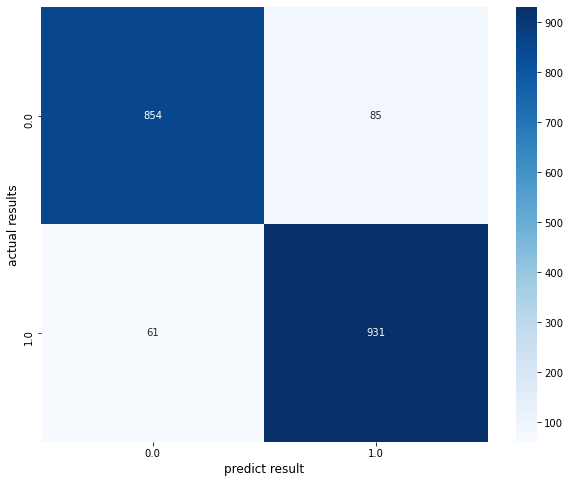

In [81]:
prediction = cnnmodel.predict(x_test)
yhat_cnn = predict_binary_class(prediction)


class_report(y_test,yhat_cnn,dic_y_mapping)

### save model

In [173]:
cnnmodel.save("/data/jyu29/nlp/text classfication/checkpoint/cnn_model1")

INFO:tensorflow:Assets written to: /data/jyu29/nlp/text classfication/checkpoint/cnn_model1/assets


In [14]:
rmodel = keras.models.load_model("/data/jyu29/nlp/text classfication/checkpoint/cnn_model1")

In [16]:
rmodel.predict(x_test)

array([[8.8657570e-01],
       [2.0835698e-03],
       [9.9986827e-01],
       ...,
       [9.9975210e-01],
       [9.8814583e-01],
       [3.3214205e-06]], dtype=float32)

In [ ]:
# layer = Embedding(max_words+1, 128, input_length=max_len, trainable=False)(inputs)
# ## 卷积层和池化层(词窗大小为3 128核)
# cnn = Convolution1D(128, 3, padding='same', strides = 1, activation='relu')(layer)
# cnn = MaxPool1D(pool_size=4)(cnn)
# ## Dropout防止过拟合
# flat = Flatten()(cnn)
# drop = Dropout(0.3)(flat)
# ## 全连接层
# main_output = Dense(num_labels, activation='softmax')(drop)
# model = Model(inputs=inputs, outputs=main_output)




## ‘’‘keras tuner’‘’

KerasTuner is an easy-to-use, scalable hyperparameter optimization framework that solves the pain points of hyperparameter search. Easily configure your search space with a define-by-run syntax, then leverage one of the available search algorithms to find the best hyperparameter values for your models. KerasTuner comes with Bayesian Optimization, Hyperband, and Random Search algorithms built-in, and is also designed to be easy for researchers to extend in order to experiment with new search algorithms.

In [145]:
import keras_tuner as kt


In [18]:
def hpmodel(hp):
    """
    Build model for hyperparameters tuning
    
    hp: HyperParameters class instance
    """
    vocab_size = 5000
    embedding_dim = 256
    
    # defining a set of hyperparametrs for tuning and a range of values for each

    model = keras.Sequential()
#     model = keras.Sequential()
    model.add(keras.layers.Embedding(vocab_size, embedding_dim))
    model.add(keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,return_sequences=True)))
#     model.add(keras.layers.Dropout(0.85))
#     model.add(keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
#     model.add(keras.layers.Dense(64, activation='relu'))
#     model.add(keras.layers.Dropout(0.85))
#     model.add(keras.layers.Dense(1, activation='sigmoid'))
    

    model.add(layers.Dense(128))
    model.add(keras.layers.Dropout(0.5))


    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-3, 5e-4])),
#         loss='categorical_crossentropy',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model


    
#     input_size = (544,544,3)
#     target_labels = [str(i) for i in range(21)]
    
#     # building a model
#     model = u(input_size = input_size,
#               start_neurons = start_neurons,
#               net_depth = net_depth,
#               output_classes = len(target_labels),
#               dropout = dropout,
#               bn_after_act = bn_after_act,
#               activation = activation)
    
#     # model compilation
#     hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 5e-4])



    
    return model



In [19]:
import keras_tuner as kt


# tuner = kt.Hyperband(model_builder,
#                      objective='val_accuracy',
#                      max_epochs=15,
#                      )
tuner = RandomSearch(
    hpmodel,
    objective='val_accuracy',  #优化目标为精度'val_accuracy'（最小化目标）
    max_trials=10,   #总共试验5次，选五个参数配置
    executions_per_trial=3, 
    directory='keras_hypertuner'#每次试验训练模型三次
)


In [20]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0005], 'ordered': True}


In [21]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(x_train,
            y_train, epochs=5, 
             callbacks=[stop_early],
             validation_data=(x_test, y_test))


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
learning_rate     |0.001             |?                 

Epoch 1/5
223/223 [==============================] - 45s 189ms/step - loss: 0.8355 - accuracy: 0.3372 - val_loss: 0.6932 - val_accuracy: 0.3187
Epoch 2/5
223/223 [==============================] - 41s 186ms/step - loss: 0.6933 - accuracy: 0.3365 - val_loss: 0.6932 - val_accuracy: 0.3187
Epoch 3/5
 74/223 [========>.....................] - ETA: 25s - loss: 0.6935 - accuracy: 0.3442

KeyboardInterrupt: 

In [ ]:

models = tuner.get_best_models(num_models=2)

In [ ]:
tuner.results_summary()

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")
model = tuner.hypermodel.build(best_hps)
history = model.fit(img_train, label_train, epochs=50, validation_split=0.2)
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

## rf tree model

In [112]:
df = pd.read_csv('/data/jyu29/nlp/text classfication/invalid_remark/data/invalid_remark_raw_masterdata_v2.csv')
# df = df.fillna('谢谢老板')
df = df.loc[df.text.notnull()]
df.head(2)

,order_bn,text,label_confirm
0,5.67e+17,亲，请尽快帮我发货可以吗？我周六要出去露营，着急要,1
1,6.65e+17,请检查后发货哦。谢谢！,1


In [123]:
from gensim.models import KeyedVectors

def read_max_seq():
    with open(r'./data/max_guan_test/dataRank/cs_remark/data/max_seq_id.txt','r') as f:
        max_id=f.read()
    return max_id

def load_stop():
    with open(r'/data/max_guan_test/dataRank/cs_remark/data/stopword.txt',encoding='utf8') as f:
        line_list=f.readlines()
        stopword_list=[k.strip() for k in line_list]
        stopword_set=set(stopword_list)
        print('停顿词列表，即变量stopword_list中共有%d个元素' %len(stopword_list))
        print('停顿词集合，即变量stopword_set中共有%d个元素' %len(stopword_set))
    return stopword_set

def get_contentVector(cutWords, word2vec_model):
    vector_list = [word2vec_model.wv[k] for k in cutWords if k in word2vec_model]
    if len(vector_list)>0:
        contentVector = np.array(vector_list).mean(axis=0)
    else:
        contentVector = None 
    return contentVector

def tokenizer_word(rmks,stopword_set,cut_mode=True):
    
    jieba.load_userdict(r'/data/max_guan_test/dataRank/cs_remark/variables/myDict.txt')
    
    wordseg=[]
    for item in rmks:
        tempList=[]
        
        item=str(item)
        tempList=[word for word in jieba.cut(item,cut_all=cut_mode) if word not in stopword_set]
        newList=blank_rm(tempList)
        wordseg.append(newList)
    
    return wordseg
def x_create(wordseg,model):
    num_seg=len(wordseg)
    contentVector_matrix = np.zeros((num_seg,200))
    for i in range(num_seg):
        cutWords = wordseg[i]
        
        ctvector=get_contentVector(cutWords, model)
        if ctvector is not None:
            
            contentVector_matrix[i]=ctvector
        
    return contentVector_matrix








In [127]:

# data.reset_index(drop=True,inplace=True)
# data['invalid_remark']=pd.Series(prediction)
#     re_check=prep.reconfirm_deli(wordcat)
#     data['recheck']=pd.Series(re_check)
#     data['invalid_remark']=data['invalid_remark']*data['recheck']
    #data['invalid_remark']=data['invalid_remark'].astype('int')


In [506]:
# from transformers import TFBertForSequenceClassification,BertTokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')


# offline test

In [30]:
dfa = pd.read_csv('/data/jyu29/nlp/text classfication/invalid_remark/data/remark_validation.csv')
dfa.head()

,seq_id,order_bn,customer_remark,remark_Info,manual tag,invalid_remark_new,invalid_remark_old,mannual vs old,mannual vs updated,old vs updated,order_time,flag,create_time
0,"438,305",cn1938189365,2021-07-06 10:55:42第一笔订单支付，之后顾客说没有退到新人优惠券，线上券应...,"[{""channel"":""CUBE"",""commentsType"":2,""uuid"":""60...",0.0,1.0,1.0,False,False,True,2021-07-13 11:26:17,1.0,2021-07-13 11:30:15
1,"496,952",202109150910001990,cn2038960864,"[{""channel"":""CUBE"",""commentsType"":2,""uuid"":""61...",0.0,1.0,1.0,False,False,True,2021-09-15 9:25:54,1.0,2021-09-15 9:25:54
2,"496,953",202109150910001990,cn2038960864,"[{""channel"":""CUBE"",""commentsType"":2,""uuid"":""61...",0.0,1.0,1.0,False,False,True,2021-09-15 9:25:54,1.0,2021-09-15 9:26:04
3,"496,961",202109150910003045,cn2036156601,"[{""channel"":""CUBE"",""commentsType"":2,""uuid"":""61...",0.0,1.0,1.0,False,False,True,2021-09-15 9:44:13,1.0,2021-09-15 9:44:14
4,"496,962",202109150910003045,cn2036156601,"[{""channel"":""CUBE"",""commentsType"":2,""uuid"":""61...",0.0,1.0,1.0,False,False,True,2021-09-15 9:44:13,1.0,2021-09-15 9:44:26


## new

In [85]:
# dfa = dfa.loc[dfa['manual tag'].notnull()]

In [31]:
dfa = dfa.loc[dfa.seq_id.notnull()]

In [20]:
def load_stopword():
#     jieba.load_userdict(r"/data/jyu29/nlp/text classfication/ilsten/data/stopwordmaster.txt")
    jieba.load_userdict(r"/data/jyu29/nlp/text classfication/ilsten/data/dictionary/joe_remark_dict.txt")

    with open(r'/data/jyu29/nlp/text classfication/ilsten/data/stopword.txt',encoding='utf8') as f:
        line_list=f.readlines()
        stopword_list=[k.strip() for k in line_list]
        stopword_set=set(stopword_list)
        print('停顿词列表，即变量stopword_list中共有%d个元素' %len(stopword_list))
        print('停顿词集合，即变量stopword_set中共有%d个元素' %len(stopword_set))
    return stopword_set

# remove blanks
def blank_rm(blist:list):
    """去除list中的空格项/remove blank items in the list"""
    newlist=[]
    for item in blist:
       if (item != '') and (item!=' '):
           newlist.append(item)
    
    return newlist

# wordcut and clean text
def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('',line)
    return line



# load tokenizer and transform data into sequence data
def convert_text_to_sequence(input_text):
    token = joblib.load('/data/jyu29/nlp/text classfication/dataFile_0924_2.pkl') #模型载入
    text_sequence = token.texts_to_sequences(input_text)
    pad_text_sequence = sequence.pad_sequences(text_sequence)
    return pad_text_sequence
    
def predict_binary_class(yhat):
    yhat[yhat<=0.5]=0
    yhat[yhat>0.5]=1
    return yhat
    
    

In [21]:
def off_predict(data,model):
#     rnnmodel = keras.models.load_model('/data/jyu29/nlp/text classfication/invalid_remark/model/rnnmodel_0923.h5')
    rnnmodel = model
    print ('Model loaded')
            #query = query.reindex(columns=model_columns, fill_value=0)
    stopword = load_stopword()
    data = data.fillna('谢谢老板')
    data['clean_text'] = data['customer_remark'].apply(remove_punctuation)

    data['cut_text'] = data['clean_text'].apply(lambda x: " ".join([w for w in list(jieba.cut(x))]))

    sequence_data = convert_text_to_sequence(data['cut_text'])
    prediction = rnnmodel.predict(sequence_data)
    yhat = predict_binary_class(prediction)
    data['invalid_remark_joe'] = yhat
    return data[['seq_id','invalid_remark_joe','manual tag']]





In [32]:
df2 = off_predict(dfa,model)
# dfa.isnull().sum()

Model loaded
停顿词列表，即变量stopword_list中共有767个元素
停顿词集合，即变量stopword_set中共有750个元素


In [33]:
yhat = df2['invalid_remark_joe'].to_numpy()
y = df2['manual tag'].to_numpy()
# yhat_old = dfa['invalid_remark_old'].to_numpy()

In [34]:
yhat.shape

(3027,)

In [35]:
df2, dic_y_mapping = add_encode_variable(df2, "manual tag")


accuracy 0.9131152956722828
              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86       973
         1.0       0.92      0.96      0.94      2054

    accuracy                           0.91      3027
   macro avg       0.91      0.89      0.90      3027
weighted avg       0.91      0.91      0.91      3027



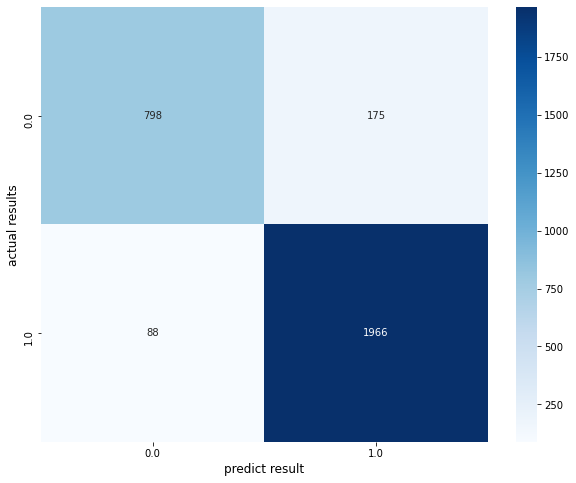

In [36]:
class_report(y,yhat,dic_y_mapping)

accuracy 0.8969276511397423
              precision    recall  f1-score   support

         0.0       0.90      0.77      0.83       973
         1.0       0.90      0.96      0.93      2054

    accuracy                           0.90      3027
   macro avg       0.90      0.86      0.88      3027
weighted avg       0.90      0.90      0.89      3027



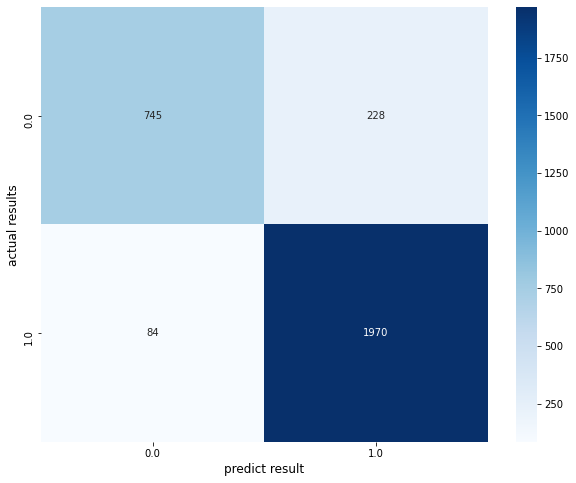

In [39]:
class_report(y,yhat,dic_y_mapping)

accuracy 0.8969276511397423
              precision    recall  f1-score   support

         0.0       0.90      0.77      0.83       973
         1.0       0.90      0.96      0.93      2054

    accuracy                           0.90      3027
   macro avg       0.90      0.86      0.88      3027
weighted avg       0.90      0.90      0.89      3027



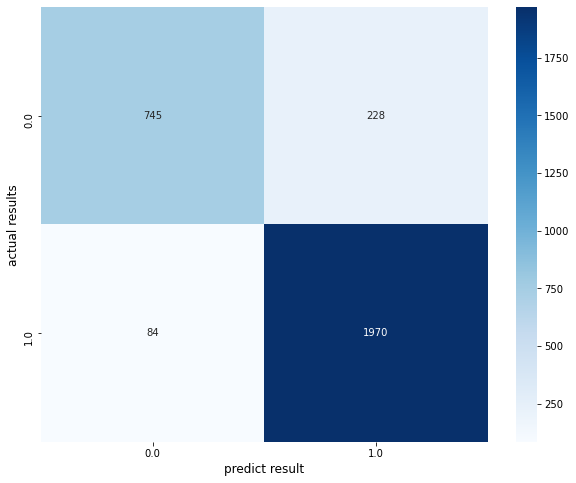

In [26]:
class_report(y,yhat,dic_y_mapping)

accuracy 0.9091509745622729
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85       973
         1.0       0.92      0.95      0.93      2054

    accuracy                           0.91      3027
   macro avg       0.90      0.89      0.89      3027
weighted avg       0.91      0.91      0.91      3027



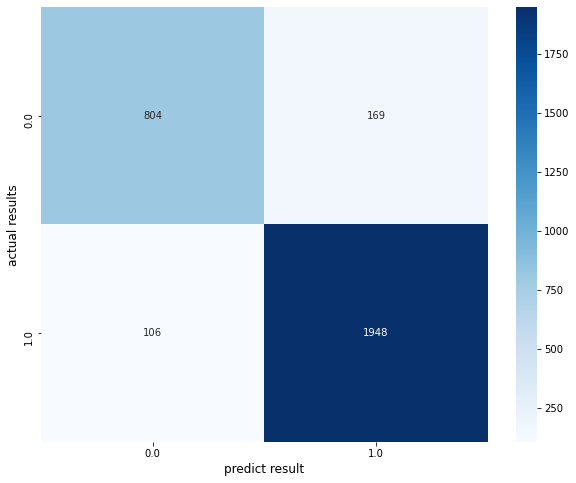

In [85]:
class_report(y,yhat,dic_y_mapping)

accuracy 0.9104724149322762
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86       973
         1.0       0.93      0.94      0.93      2054

    accuracy                           0.91      3027
   macro avg       0.90      0.89      0.90      3027
weighted avg       0.91      0.91      0.91      3027



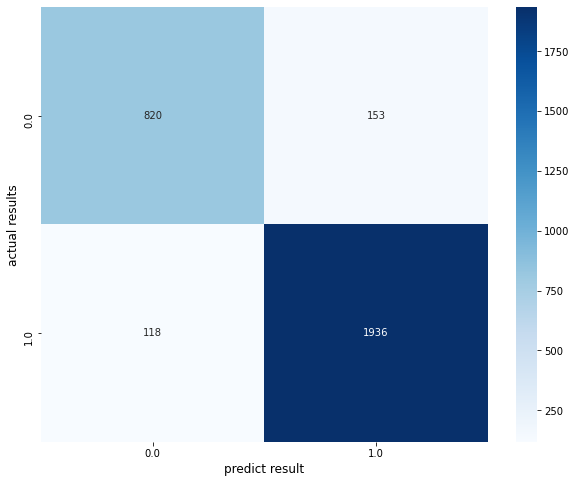

In [78]:
class_report(y,yhat,dic_y_mapping)

accuracy 0.9134456557647836
              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86       973
         1.0       0.92      0.96      0.94      2054

    accuracy                           0.91      3027
   macro avg       0.91      0.89      0.90      3027
weighted avg       0.91      0.91      0.91      3027



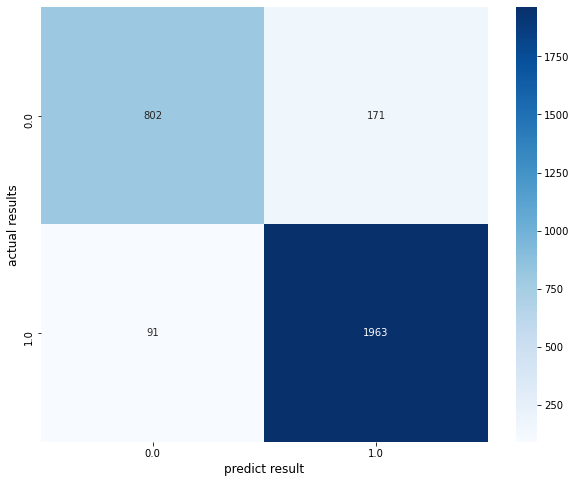

In [70]:
class_report(y,yhat,dic_y_mapping)

In [12]:
# yhat1 = df1['invalid_remark_old'].to_numpy()
# accuracy_score(y,yhat1)

accuracy 0.9081598942847704
              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85       973
         1.0       0.92      0.95      0.93      2054

    accuracy                           0.91      3027
   macro avg       0.90      0.88      0.89      3027
weighted avg       0.91      0.91      0.91      3027



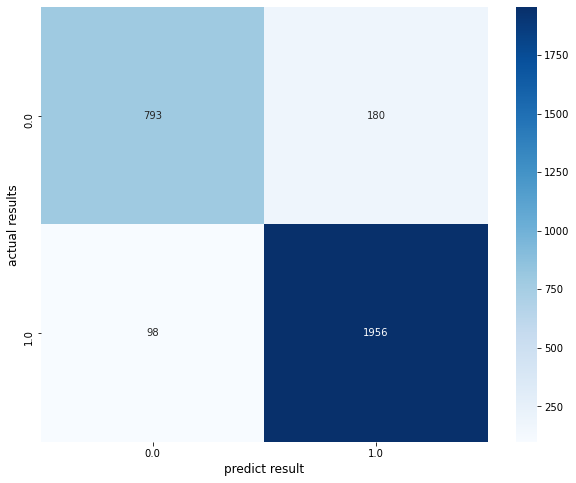

In [109]:
class_report(y,yhat,dic_y_mapping)

## old

In [138]:
deli_list=['邮政',
 '韵达',
 'EMS',
 '圆通',
 'ems',
 '天天',
 '顺丰',
 '申通',
 '百世',
 '中通',
 '汇通',
 '顺风',
 '德邦',
 '完结',
 '扣单']


def reconfirm_deli(wordcat):
    nlist=len(wordcat)
    new_list=[]
    for i in range(nlist):
        temp_result=0
        for item in deli_list:
            if item in wordcat[i]:
                temp_result+=1
        if temp_result>0:
            new_list.append(0)
        else:
            new_list.append(1)
            
    return new_list


In [128]:
filename=r'/data/max_guan_test/dataRank/cs_remark/model/doc2_model_user_0416.model'
word2vec_model=KeyedVectors.load(filename, mmap='r')
    #query = pd.read_csv(r')
lr = joblib.load(r'/data/max_guan_test/dataRank/cs_remark/model/doc_model_user_01.pkl')
print('Model loaded')
            #query = query.reindex(columns=model_columns, fill_value=0)
stp_word=load_stop()
wordcat=tokenizer_word(dfa['customer_remark'].tolist(),stp_word)
    
X=x_create(wordcat,word2vec_model)
prediction = list(lr.predict(X))
dfa.reset_index(drop=True,inplace=True)
dfa['invalid_remark']=pd.Series(prediction)

Model loaded
停顿词列表，即变量stopword_list中共有767个元素
停顿词集合，即变量stopword_set中共有750个元素


In [130]:
dfa.head(1)

,seq_id,order_bn,customer_remark,remark_Info,manual tag,invalid_remark_new,invalid_remark_old,mannual vs old,mannual vs updated,old vs updated,order_time,flag,create_time,manual tag_id,invalid_remark
0,"438,305",cn1938189365,2021-07-06 10:55:42第一笔订单支付，之后顾客说没有退到新人优惠券，线上券应...,"[{""channel"":""CUBE"",""commentsType"":2,""uuid"":""60...",0.0,1.0,1.0,False,False,True,2021-07-13 11:26:17,1.0,2021-07-13 11:30:15,0,0


In [134]:
y = dfa['manual tag'].to_numpy()
yhat_old_tree = dfa['invalid_remark'].to_numpy()

accuracy 0.5170135447637926
              precision    recall  f1-score   support

         0.0       0.40      0.97      0.56       973
         1.0       0.96      0.30      0.46      2054

    accuracy                           0.52      3027
   macro avg       0.68      0.64      0.51      3027
weighted avg       0.78      0.52      0.49      3027



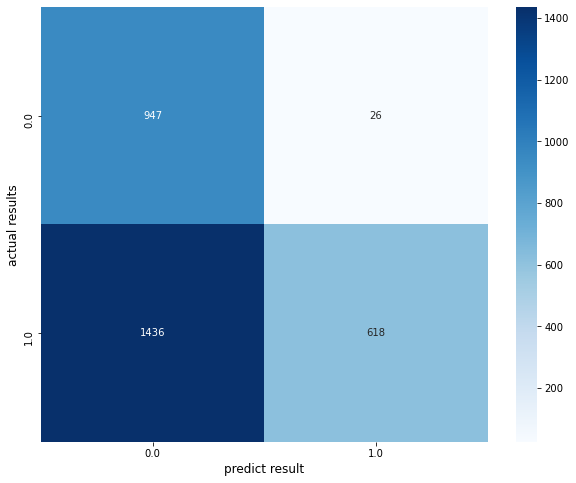

In [135]:
class_report(y,yhat_old_tree,dic_y_mapping)

### add hard rule

In [139]:
dfa.reset_index(drop=True,inplace=True)
dfa['invalid_remark']=pd.Series(prediction)

re_check=reconfirm_deli(wordcat)
    #print(data[['seq_id','invalid_remark']])
dfa['recheck']=pd.Series(re_check)
dfa['invalid_remark_edit']=dfa['invalid_remark']*dfa['recheck']

In [140]:
y = dfa['manual tag'].to_numpy()
yhat_old_tree_edit = dfa['invalid_remark_edit'].to_numpy()

accuracy 0.5193260654112983
              precision    recall  f1-score   support

         0.0       0.40      0.98      0.57       973
         1.0       0.97      0.30      0.46      2054

    accuracy                           0.52      3027
   macro avg       0.68      0.64      0.51      3027
weighted avg       0.79      0.52      0.49      3027



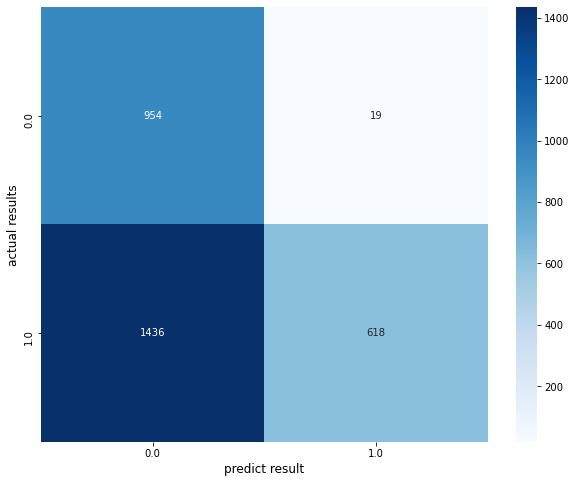

In [141]:
class_report(y,yhat_old_tree_edit,dic_y_mapping)

## old retrain

In [142]:
df = pd.read_csv('/data/jyu29/nlp/text classfication/invalid_remark/data/invalid_remark_raw_masterdata_v2.csv')
# df = df.fillna('谢谢老板')
df = df.loc[df.text.notnull()]
df.head(2)

,order_bn,text,label_confirm
0,5.67e+17,亲，请尽快帮我发货可以吗？我周六要出去露营，着急要,1
1,6.65e+17,请检查后发货哦。谢谢！,1


In [143]:
with open(r'/data/max_guan_test/dataRank/cs_remark/data/stopword.txt',encoding='utf8') as f:
    line_list=f.readlines()
    stopword_list=[k.strip() for k in line_list]
    stopword_set=set(stopword_list)
    print('停顿词列表，即变量stopword_list中共有%d个元素' %len(stopword_list))
    print('停顿词集合，即变量stopword_set中共有%d个元素' %len(stopword_set))


# In[59]:


jieba.load_userdict(r'/data/max_guan_test/dataRank/cs_remark/variables/myDict.txt')

def blank_rm(blist:list):
    """去除list中的空格项/remove blank items in the list"""
    newlist=[]
    for item in blist:
       if (item != '') and (item!=' '):
           newlist.append(item)
    
    return newlist

# In[5]:
wordseg=[]
rmks=df['text'].tolist()
wordseg=[]
for item in rmks:
    tempList=[]
    if type(item)=='int':
        item=str(item)
    tempList=[word for word in jieba.cut(item) if word not in stopword_set]
    newList=blank_rm(tempList)
    wordseg.append(newList)


#Y=remarks['cat'].tolist()    

# In[6]:

#X_train,X_test,Y_train,Y_test=prep.split_data(wordseg,Y,0.8)

# In[7]:
startTime = time.time()
word2vec_model2 = Word2Vec(wordseg, size=200, iter=10, min_count=1)
usedTime = time.time() - startTime
print('形成word2vec模型共花费%.2f秒' %usedTime)

停顿词列表，即变量stopword_list中共有767个元素
停顿词集合，即变量stopword_set中共有750个元素
形成word2vec模型共花费2.09秒


In [145]:
def get_contentVector(cutWords, word2vec_model):
    vector_list = [word2vec_model.wv[k] for k in cutWords if k in word2vec_model]
    contentVector = np.array(vector_list).mean(axis=0)
    return contentVector

word2vec_model2.wv.most_similar('中通')


[('EMS', 0.9968158602714539),
 ('汇通', 0.9951754808425903),
 ('百世', 0.9944603443145752),
 ('不发', 0.9932484030723572),
 ('别发', 0.9924760460853577),
 ('ems', 0.992409348487854),
 ('韵达', 0.9916215538978577),
 ('寄', 0.9905543923377991),
 ('不到', 0.9904242753982544),
 ('天天', 0.9899792671203613)]

In [146]:

def tokenizer_word(rmks,stopword_set,cut_mode=True):
    
    jieba.load_userdict(r'./variables/myDict.txt')
    
    wordseg=[]
    for item in rmks:
        tempList=[]
        
        item=str(item)
        tempList=[word for word in jieba.cut(item,cut_all=cut_mode) if word not in stopword_set]
        newList=blank_rm(tempList)
        wordseg.append(newList)
    
    return wordseg

def get_contentVector(cutWords, word2vec_model):
    vector_list = [word2vec_model.wv[k] for k in cutWords if k in word2vec_model]
    if len(vector_list)>0:
        contentVector = np.array(vector_list).mean(axis=0)
    else:
        contentVector = None 
    return contentVector

def x_create(wordseg,model):
    num_seg=len(wordseg)
    contentVector_matrix = np.zeros((num_seg,200))
    for i in range(num_seg):
        cutWords = wordseg[i]
        
        ctvector=get_contentVector(cutWords, model)
        if ctvector is not None:
            
            contentVector_matrix[i]=ctvector
        
    return contentVector_matrix

In [147]:
X = x_create(wordseg,word2vec_model2)


In [151]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



In [164]:


labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(df['label_confirm'])
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier().fit(train_X,train_y)
prd = clf.predict(test_X)
# accuracy_score(test_X,test_y)
# param_grid = {'n_estimators': [100, 200, 300], 'criterion':['gini','entropy'],\
#               'min_samples_split':[3,5,7]}
# grid_search = GridSearchCV(rnd_clf, param_grid=param_grid, verbose=1,scoring='precision_micro')
# start=time.time()
# grid_search.fit(train_X,train_y)
# end=time.time()
# print('time used is ',end-start/3600)

In [165]:
accuracy_score(test_y, prd)

0.9371534195933456

In [166]:
dfa.head(1)

,seq_id,order_bn,customer_remark,remark_Info,manual tag,invalid_remark_new,invalid_remark_old,mannual vs old,mannual vs updated,old vs updated,order_time,flag,create_time,manual tag_id,invalid_remark,recheck,invalid_remark_edit
0,"438,305",cn1938189365,2021-07-06 10:55:42第一笔订单支付，之后顾客说没有退到新人优惠券，线上券应...,"[{""channel"":""CUBE"",""commentsType"":2,""uuid"":""60...",0.0,1.0,1.0,False,False,True,2021-07-13 11:26:17,1.0,2021-07-13 11:30:15,0,0,1,0


In [167]:
wordseg1=[]
rmks=dfa['customer_remark'].tolist()
wordseg=[]
for item in rmks:
    tempList=[]
    if type(item)=='int':
        item=str(item)
    tempList=[word for word in jieba.cut(item) if word not in stopword_set]
    newList=blank_rm(tempList)
    wordseg1.append(newList)

In [169]:
xnew = x_create(wordseg1,word2vec_model2)
ynew = labelEncoder.fit_transform(dfa['manual tag'])


In [170]:
yhat_oldmodel = clf.predict(xnew)

In [174]:
accuracy_score(ynew,yhat_oldmodel)

0.9061777337297654

accuracy 0.9061777337297654
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       973
         1.0       0.93      0.93      0.93      2054

    accuracy                           0.91      3027
   macro avg       0.89      0.89      0.89      3027
weighted avg       0.91      0.91      0.91      3027



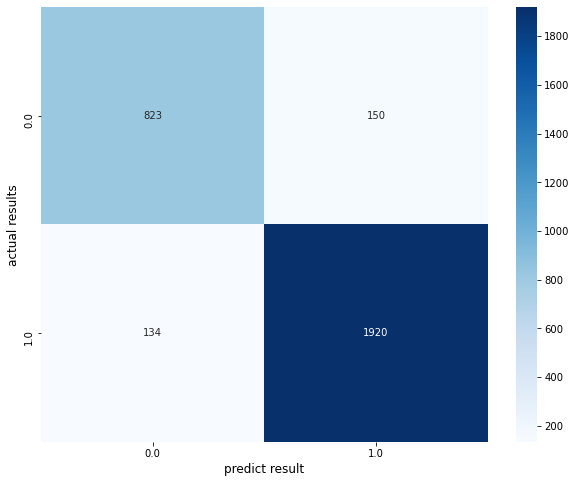

In [175]:
class_report(ynew,yhat_oldmodel,dic_y_mapping)